# Graphical Exploratory Data Analysis (GEDA)
## Datos de CONAGUA

##### Arciaga, Yusuri., López, Carlos., Tejada, Laura. & Villalobos, Elena.

***

El presente trabajo tiene como objetivo realizar el Análisis Exploratorio Gráfico de la base de datos del consumo de agua de la Ciudad de México. Este trabajo nos proporcionará información sobre el contexto y alcance de la información contenida en esta base datos para desarrollar, en el futuro, un modelo de predicción del Índice de Desarrollo contenida en la misma base.

#### Características generales de la base 

Esta base de datos contiene información de los medidores de consumo de agua, instalados o autorizados por el Sistema de Aguas. Tenemos **71102 observaciones** y **17 variables**: 

Se tienen dos mediciones principales del consumo de agua:

- `consumo_total`: que es el consumo total de acuerdo a los medidores instalados o autorizados por el Sistema de Aguas.
- `comsumo_prom`: que es un cálculo promedio de consumo de agua que se aplica para cubrir las faltas o fallas en los aparatos de medición. 

Para el consumo de agua existen diferentes tipos de uso que tendrán su respectiva medición de consumo total y promedio:

- Doméstico: Uso habitacional (`consumo_prom_dom`, `consumo_total_dom`).
- No Doméstico: Uso no doméstico (`consumo_prom_no_dom`, `consumo_total_no_dom`).
- Mixto: uso doméstico y no doméstico (`consumo_total_mixto`, `consumo_prom_mixto`).

Adicional esta base tiene información de geolocalización:

- `alcaldía`: Variable categórica que contiene las 16 alcaldías de la CDMX.
- `colonia`: Variable categórica que contiene 1340 colonias registradas.
- `latitud` y `longitud`: Variables numéricas que representan las coordenadas de los medidores. 

La información temporal del consumo de agua es:

- `bimestre`: que contiene la información de solo tres bimestres.
- `anio`: que es solo tiene la información del año 2019.

Adicionalmente, tiene información que diferencía territorialmente a la población de la CDMX de acuerdo a su nivel de desarrollo económico (`indice_des`), agregando la información por colonia, los niveles son:

   - POPULAR: Niveles de desarrollo más bajos de la Ciudad. 
   - BAJO: Niveles de desarrollo bajo de la Ciudad.
   - MEDIO: Niveles de desarrollo medio de la Ciudad.
   - ALTO: Niveles de desarrollo altos de la Ciudad. 
  
Tomamos referencia de fuentes externas:
- Número de habitantes por región extraído de INEGI

## 1. Consumo de agua

Primero queremos tener información sobre todas las variables que tenemos de consumo de agua:

In [159]:
# Paqueterías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats
# Ajustes de gráficos
sns.set(style='whitegrid',rc={'figure.figsize':(11,11)},palette='crest')

In [160]:
# Cargamos los datos
df = pd.read_csv("data_consumo_agua.csv")

In [161]:
# Observaciones y variables
df.shape

(71102, 17)

In [162]:
# Observamos de manera general la base
df.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [163]:
# Seleccionando solo variables de interes y reordenarlas
df = df[['consumo_total', 'consumo_total_dom', 'consumo_total_no_dom', 'consumo_total_mixto',
        'consumo_prom', 'consumo_prom_dom', 'consumo_prom_no_dom', 'consumo_prom_mixto',
        'alcaldia','colonia','bimestre','indice_des','latitud','longitud']]

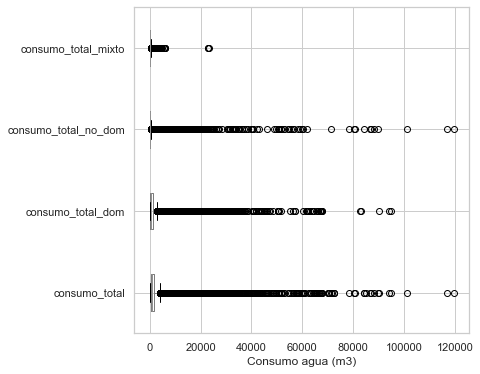

In [176]:
df[['consumo_total', 
    'consumo_total_dom', 
    'consumo_total_no_dom', 
    'consumo_total_mixto']].boxplot(vert=False,
                                   figsize=[6,6])\
.set_xlabel('Consumo agua (m3)')
plt.show()

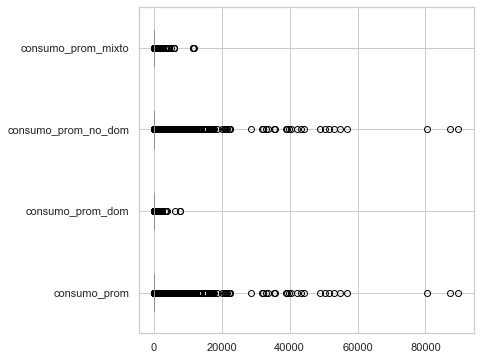

In [165]:
df[['consumo_prom', 
    'consumo_prom_dom', 
    'consumo_prom_no_dom', 
    'consumo_prom_mixto']].boxplot(vert=False,
                                  figsize=[6,6])\
.set_xlabel('Consumo agua (m3)')

plt.show()

Como se observa en tanto en las mediciones de agua totales como promedio existen demasiados outliers, por lo que las cajas no se podrán apreciar de manera clara. Ahora observaremos el comportamiento de estas variables sin tomar en cuenta los outliers. 

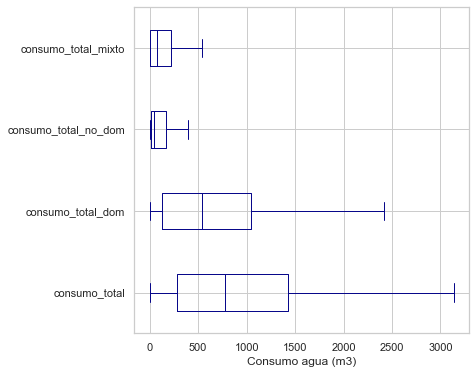

In [183]:
df_clean[['consumo_total', 
    'consumo_total_dom', 
    'consumo_total_no_dom', 
    'consumo_total_mixto']].boxplot(vert=False,
                                   figsize=[6,6],
                                    showfliers=False,
                                    color='#08088A')\
.set_xlabel('Consumo agua (m3)')
plt.show()

En este gráfico se puede apreciar más claramente la distribución de los valores en el consumo total de agua, así como de los tipos de consumo. Se observa que el consumo total de agua tiene un comportamiento similar al de consumo total doméstico. En cuanto al consumo total mixto y no doméstico, tienen mucho menos m3 de ocupación de agua y tienen comportamientos similares.

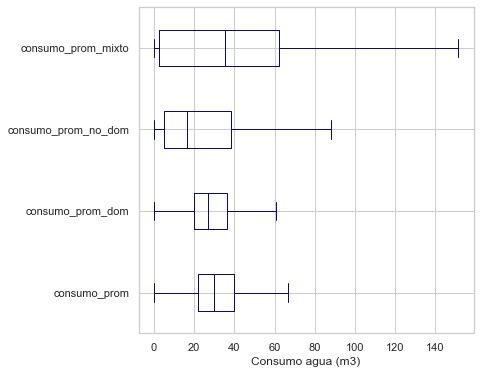

In [178]:
df_clean_prom[['consumo_prom',
               'consumo_prom_dom', 
               'consumo_prom_no_dom', 
               'consumo_prom_mixto']].boxplot(vert=False,
                                              figsize=[6,6],
                                              showfliers=False,
                                              color='#08088A')\
.set_xlabel('Consumo agua (m3)')
plt.show()

Como se observa en ambos gráficos de consumo promedio de agua va en un rango no tan alto como el de consumo total. Uno esperaría que si son promedios estarían en un rango de 0 a 1, o de 0 a 100, pero a pesar de que muchos de los valores se encuentran entre esos rangos, tenemos muchos outliers que sobre pasan esa medida. Por lo tanto surge la duda de exactamente cómo se están calculando esas medidas. Ya que analizamos las variables de consumo de agua de manera individual, ahora analizaremos las otras variables categóricas de manera individual.

## 2.  Alcaldías, bimestres e Índices de desarrollo.

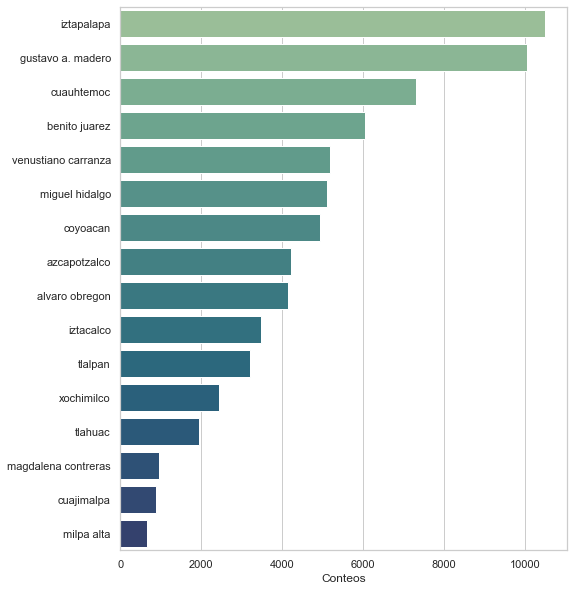

In [251]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x=df.alcaldia.value_counts(), 
                 y=df.alcaldia.value_counts().index, data=df,           
                palette='crest')
ax.set(xlabel='Conteos')
plt.show()

Notablemente tenemos más información en Iztapalaba y Gustavo A. Madero, mientras que de las alcaldías en que tenemos menos conteos tenemos son la Magdalena Contreras, Cuajimalpa y Milpa Alta. 

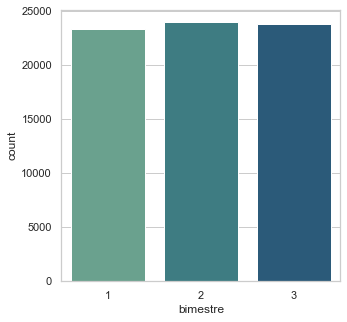

In [257]:
plt.figure(figsize=(5,5))
chart1 = sns.countplot(x=df['bimestre'],palette='crest')

Observamos que los conteos de bimestre son muy similares entre ellos.

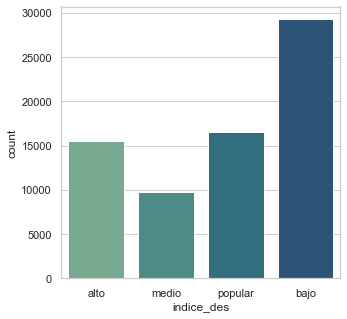

In [260]:
plt.figure(figsize=(5,5))
chart1 = sns.countplot(x=df['indice_des'],palette='crest')

Observamos que el índice de desarrollo más común es el bajo que casi es el doble del índice de desarrollo popular. Ésta última categoría tiene casi el mísmo número de conteos que alto. La categoría de medio es la que tiene menos mediciones. 

A continuación presentaremos gráficos de acuerdo a diversas preguntas planteadas.

## 3. ¿Existe diferencia entre los consumos de agua de acuerdo al tipo de uso en las alcaldías?

Sabemos que `consumo_total` contiene una cantidad considerable de outliers, por lo que para observar el comportamiento de tendencia, tomaremos los valores de la base que están en un rango más considerable. 

In [264]:
q = df['consumo_total'].quantile(0.90)
q

3643.601000000001

In [268]:
df = df[df['consumo_total']<q]

df.shape[0]

63991

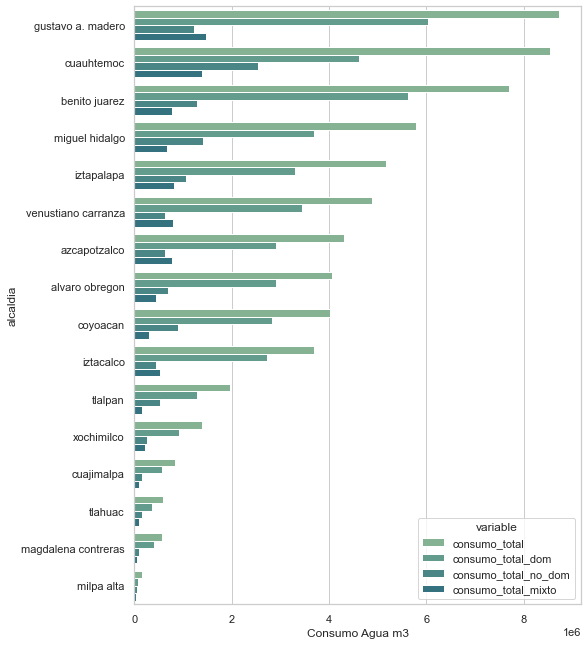

In [281]:
# Obtenemos valores
consu_alca_tot = pd.DataFrame(df,
                      columns=['alcaldia',
                               'consumo_total',
                               'consumo_total_dom',
                               'consumo_total_no_dom',
                               'consumo_total_mixto'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)\
.melt(id_vars='alcaldia')

# Graficamos
sns.set(style='whitegrid',rc={'figure.figsize':(8,11)},palette='crest')
plt1 = sns.barplot(x="value", y="alcaldia", 
            data=consu_alca_tot, hue = 'variable')
plt1.set(xlabel='Consumo total Agua m3')
plt.show()

De principio se observa que la alcaldía Gustavo A. Madero tiene mayor consumo de agua, tanto en consumo de agua total como en consumo de agua de tipo doméstico. La alcaldía que tiene casi el mismo nivel de consumo total de agua es Cuauhtemoc que tiene menos proporción de consumo doméstico que Benito Juárez, pero tiene más de consumo mixto. 

Las demás tienen un comportamiento similar. Algo importante que mencionar es que habíamos observado anteriormente que la alcaldía Iztapalapa tiene más mediciones que las demás alcaldías, sin embargo, tiene no tiene el consumo más alto como se hubiera esperado.

Podemos cuestionarnos la definición exacta de uso doméstico o qué engloba pues si se incluyen las oficinas o corporativos en el uso no doméstico tiene sentido que la delegación Miguel Hidalgo esté en el top 3 pues ahí se concentran la mayoría de éstos.

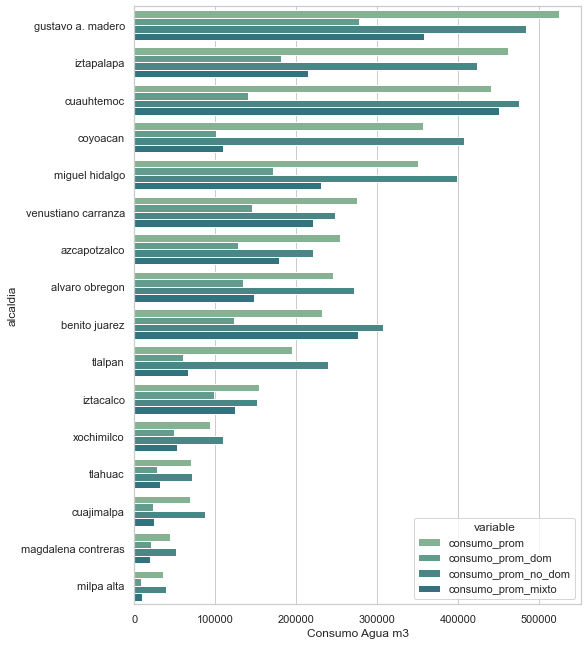

In [283]:
consu_alca_tot = pd.DataFrame(df,
                      columns=['alcaldia',
                               'consumo_prom',
                               'consumo_prom_dom',
                               'consumo_prom_no_dom',
                               'consumo_prom_mixto'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_prom'], ascending=False)\
.melt(id_vars='alcaldia')
sns.set(style='whitegrid',rc={'figure.figsize':(8,11)},palette='crest')
plt1 = sns.barplot(x="value", y="alcaldia", 
            data=consu_alca_tot, hue = 'variable')
plt1.set(xlabel='Consumo Agua m3')
plt.show()

En cuanto al consumo promedio de las alcaldías cambia en gran medida pues se supone que esta es una estimación promedio del consumo de agua donde no se tienen registros por fallas o faltas de medidores. Lo más notorio de observar en estos gráficos es que Iztapalapa sube en consumo promedio, y en consumo promedio no doméstico. Esto sucede manera similar para Gustavo A. Madero. En todas las delegaciones parece incrementar mucho el consumo promedio no doméstico y mixto. 

## 4. ¿Existe una relación entre el índice de desarrollo, la alcaldía y el consumo?

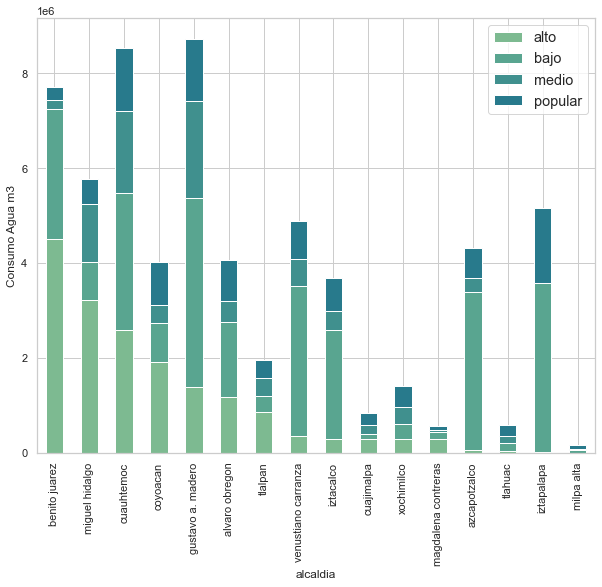

In [312]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,8)},palette='crest')
# Acomodando base de acuerdo a la alcaldia y el indice
ind_alcaldia = pd.DataFrame(df, columns=['alcaldia',
                                         'consumo_total',
                                         'indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)
# Pivoteando la base
ind_alcaldia_tot=ind_alcaldia.pivot(index='alcaldia',
                                    columns='indice_des',
                                    values='consumo_total').fillna(0)
# Ordenando la base
ind_alcaldia_tot=ind_alcaldia_tot.sort_values(by='alto',ascending=False)
# Graficamos 
plt2=ind_alcaldia_tot.plot(kind='bar',stacked=True)
plt2.set(ylabel='Consumo Agua m3')
plt2.legend(loc='best',fontsize='large')
plt.show()

Ahora observemos proporciones de acuerdo al índice.

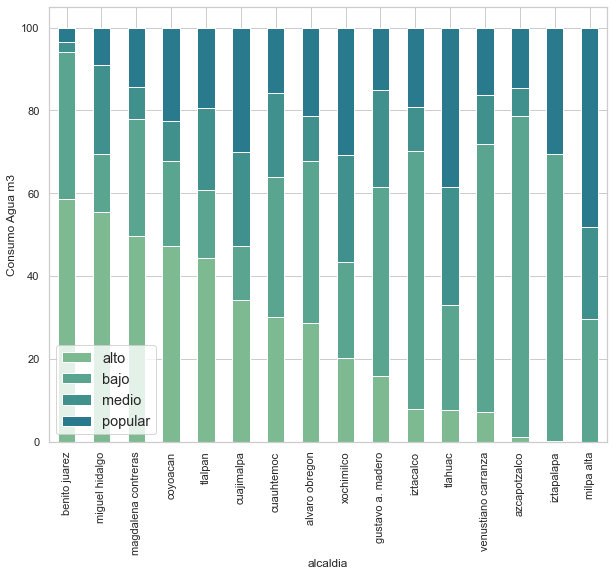

In [310]:
ind_alcaldia_prom=ind_alcaldia_tot.apply(lambda x: x*100/sum(x),axis=1)\
.sort_values(by='alto',ascending=False)
plt3=ind_alcaldia_prom.plot(kind='bar',stacked=True)
plt3.set(ylabel='Consumo Agua m3')
plt3.legend(loc='lower left',fontsize='large')
plt.show()

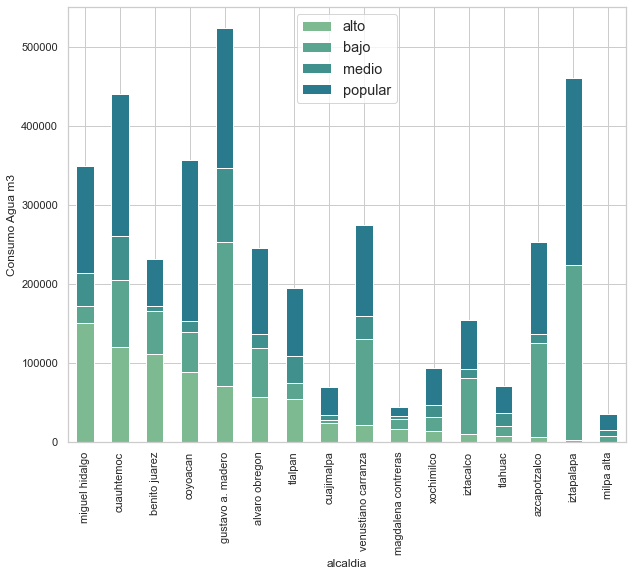

In [314]:
# Acomodando base de acuerdo a la alcaldia y el indice
ind_alcaldia = pd.DataFrame(df, columns=['alcaldia',
                                         'consumo_prom',
                                         'indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_prom'], ascending=False)
# Pivoteando la base
ind_alcaldia_tot=ind_alcaldia.pivot(index='alcaldia',
                                    columns='indice_des',
                                    values='consumo_prom').fillna(0)
# Ordenando la base
ind_alcaldia_tot=ind_alcaldia_tot.sort_values(by='alto',ascending=False)
# Graficamos 
plt2=ind_alcaldia_tot.plot(kind='bar',stacked=True)
plt2.set(ylabel='Consumo Agua m3')
plt2.legend(loc='best',fontsize='large')
plt.show()

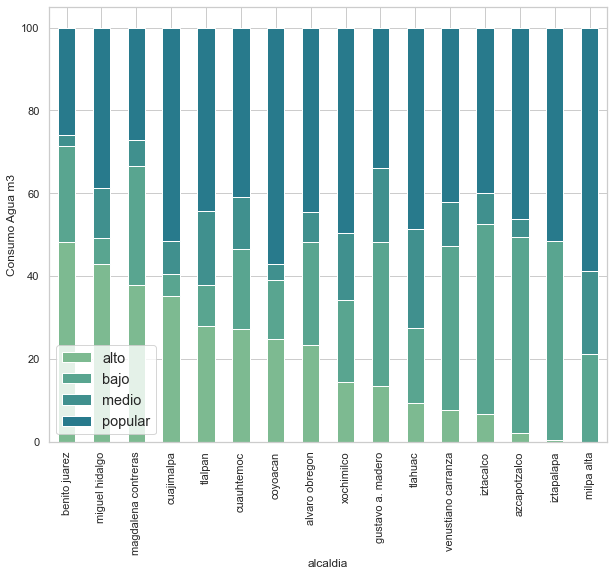

In [315]:
ind_alcaldia_prom=ind_alcaldia_tot.apply(lambda x: x*100/sum(x),axis=1)\
.sort_values(by='alto',ascending=False)
plt3=ind_alcaldia_prom.plot(kind='bar',stacked=True)
plt3.set(ylabel='Consumo Agua m3')
plt3.legend(loc='lower left',fontsize='large')
plt.show()

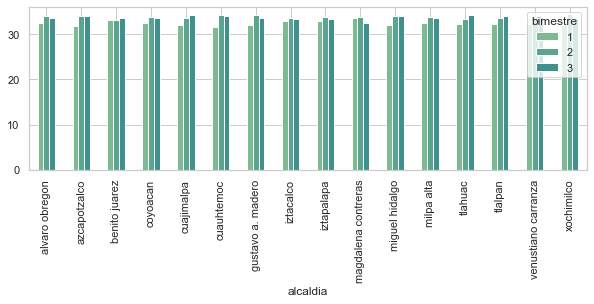

In [319]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,3)},palette='crest')
ind_alcaldia2 = df.groupby(['alcaldia','bimestre'], as_index=False)['consumo_total'].sum()\
.rename(columns={'consumo_total':'count'}).sort_values(by=['count'])

ind_alcaldia_tot2=ind_alcaldia2.pivot(index='alcaldia',
                                    columns='bimestre',
                                    values='count')

ind_alcaldia_prom2=ind_alcaldia_tot2.apply(lambda x: x*100/sum(x),axis=1)
plt4=ind_alcaldia_prom2.plot(kind='bar')

## 5. Análisis de latitud y lontidud de acuerdo al Índice de Desarrollo

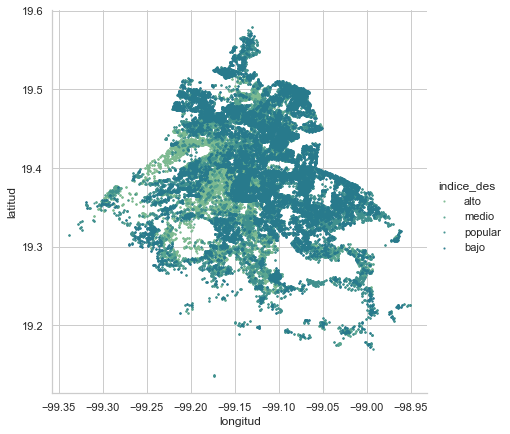

In [320]:
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='indice_des',
             fit_reg=False,height=6,scatter_kws={"s":1.5},legend_out=True)

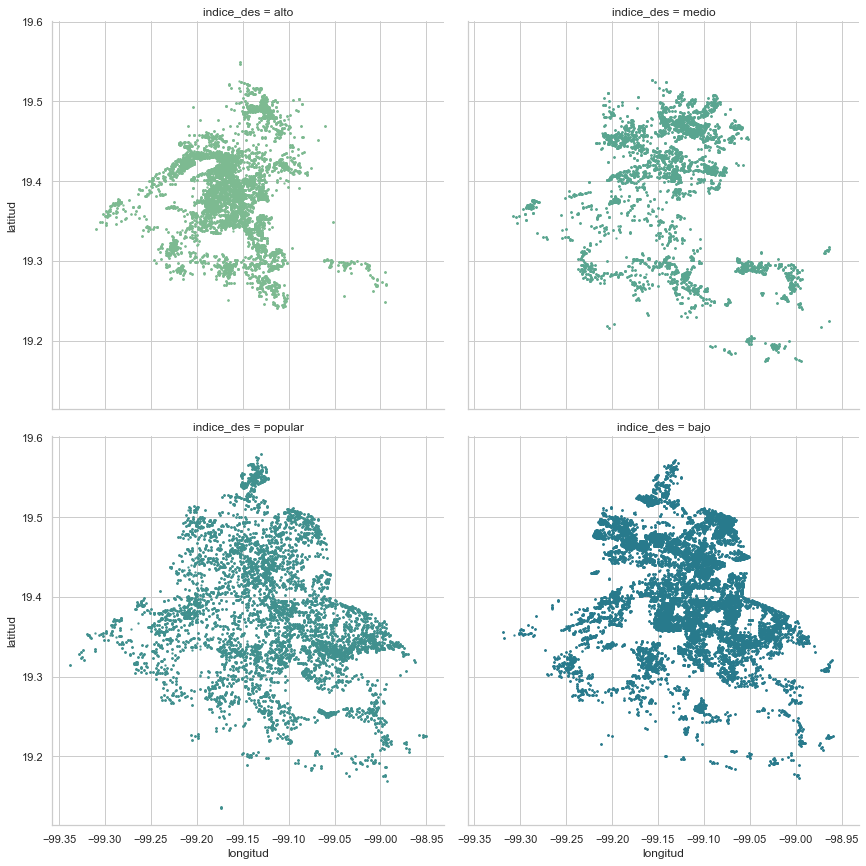

In [321]:
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='indice_des',fit_reg=False,
            col='indice_des',col_wrap=2,height=6,scatter_kws={"s":2})

## 6. Verificar si entidades con mayor densidad de habitantes consumen más agua.

Una primera gráfica sería el gasto de agua per cápita por alcaldia. Otras serían a mayor poblacion más gasto domestico. ¿Y qué tal el gasto no domestico

In [350]:
df_alc = pd.read_csv('alcaldias.csv')
df = pd.read_csv("data_consumo_agua.csv")

indice_des_dum = []

for row in df.indice_des:
    if row == 'popular':
        indice_des_dum.append(1)
    elif row == 'bajo':
        indice_des_dum.append(2)
    elif row == 'medio':
        indice_des_dum.append(3)
    else:
        indice_des_dum.append(4)

indice_desarrollo = np.array(indice_des_dum)         

df['dum_ind_des'] = indice_desarrollo

round(df.groupby(['alcaldia'])['dum_ind_des'].mean(),1)

habitantes_df = df[['consumo_total','alcaldia','consumo_total_dom',\
                    'consumo_total_no_dom']].groupby(['alcaldia'], as_index=False)\
.sum().sort_values(by=['consumo_total'], ascending=False)


df_alc = pd.read_csv('alcaldias.csv')

col_names = df_alc.columns.to_list()
col_name = []
for i in range(len(col_names)):
    col_name.append(col_names[i].replace(" ", "").lower())
df_alc.columns =col_name

df_alc['alcaldia'] = df_alc['alcaldia'].str.lower()

df_alc['alcaldia'] = habitantes_df['alcaldia']

df_alc.drop(['clave'], axis = 1, inplace = True)

hab = pd.merge(habitantes_df, df_alc, how ='left', on ='alcaldia')\
.sort_values(by=['consumo_total'], ascending=False)

hab['gasto_per_capita'] = round(hab['consumo_total']/hab['habitantes'],2)


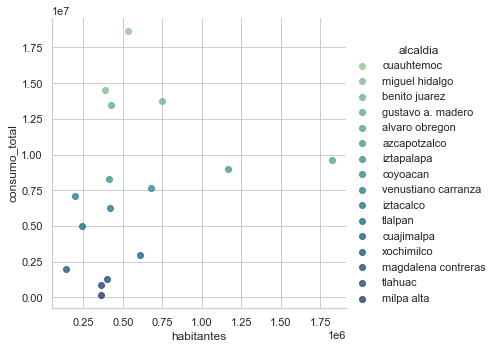

In [351]:
hab1=sns.lmplot( x="habitantes", y="consumo_total",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True,palette='crest')

Los datos de habitantes por alcaldia fueron tomados del senso realizado por el inegi en 2015, que son los datos que le corresponden al dataset con el que estamos trabajando.

Como vemos, los datos no presentan relación alguna, lo que nos no dice que no existe  algun nexo entre el numero de habitantes con el consumo total por alcaldia. 

¿Y entre consumo domestico total y población existe alguna relación?

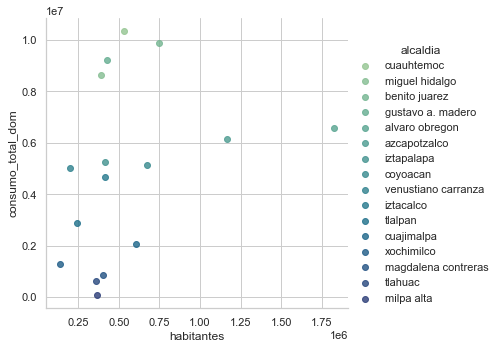

In [359]:
hab2=sns.lmplot( x="habitantes", y="consumo_total_dom",\
           data=hab, fit_reg=False, hue='alcaldia', legend=True,palette='crest')

Cantidad de habitantes vs la cantidad de datos por alcaldía, cant. habitatntes vs índice por alcaldía.

In [356]:
can_dat = pd.DataFrame(df['alcaldia'].value_counts())

can_dat.rename(columns = {'alcaldia':'cant_datos'}, inplace = True)

can_dat['alcaldia'] = can_dat.index

hab = pd.merge(hab, can_dat, how ='left', on ='alcaldia')\
.sort_values(by=['consumo_total'], ascending=False)

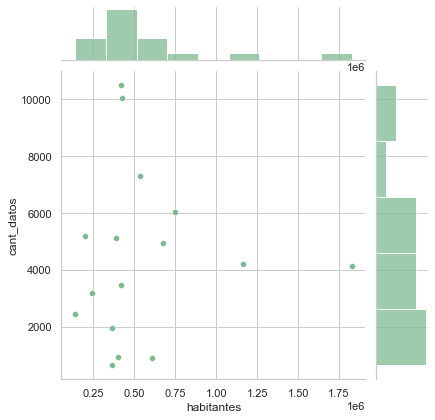

In [358]:
hab3=sns.jointplot(x=hab["habitantes"], y=hab["cant_datos"], 
                   kind='scatter', palette='crest')

## 7. Valores Faltantes 

In [340]:
df = pd.read_csv('data_consumo_agua.csv')

df_missing_values = df.groupby(['bimestre', 'alcaldia'])\
                            .agg({'consumo_total_mixto': lambda x: x.isnull().sum(),
                           'consumo_total_dom': lambda x: x.isnull().sum(),
                           'consumo_total_no_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_mixto': lambda x: x.isnull().sum(),
                           'consumo_prom_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_no_dom': lambda x: x.isnull().sum()})\
                            .reset_index()
df_missing_values.shape

(48, 8)

/Users/ele/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


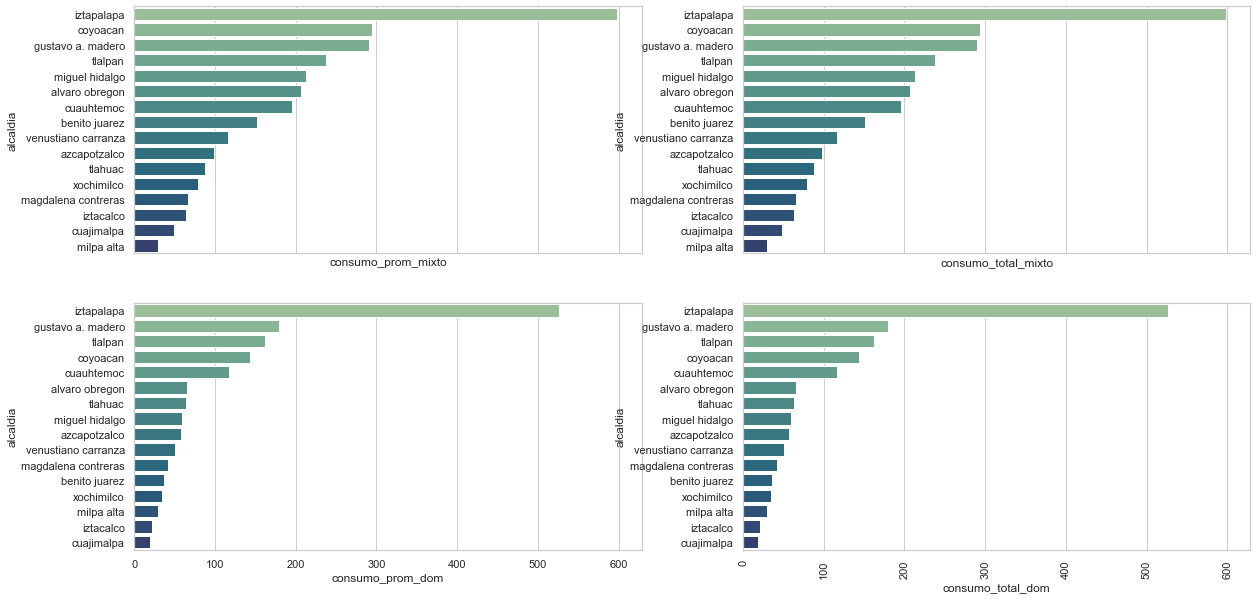

In [344]:
def funcion_nulos(df_missing_values):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10))

    df_missing_values = df_missing_values.sort_values('consumo_prom_mixto', ascending=False)
    sns.barplot(ax=axes[0,0], x=df_missing_values['consumo_prom_mixto'], y=df_missing_values['alcaldia'],
                     palette='crest', ci=0)
    df_missing_values = df_missing_values.sort_values('consumo_prom_dom', ascending=False)
    sns.barplot(ax=axes[1,0], x=df_missing_values['consumo_prom_dom'], y=df_missing_values['alcaldia'],
                     palette='crest', ci=0)

    df_missing_values = df_missing_values.sort_values('consumo_total_mixto', ascending=False)
    sns.barplot(ax=axes[0,1], x=df_missing_values['consumo_total_mixto'], y=df_missing_values['alcaldia'],
                     palette='crest', ci=0)
    df_missing_values = df_missing_values.sort_values('consumo_total_dom', ascending=False)
    sns.barplot(ax=axes[1,1], x=df_missing_values['consumo_total_dom'], y=df_missing_values['alcaldia'],
                     palette='crest', ci=0)

    plt.xticks(rotation= 90)
    fig.show()
funcion_nulos(df_missing_values)

 Lo primero que notamos es que todos los valores faltantes son en las variables numéricas, y que además todas ellas corresponden al primer bimestre del año, por lo que valdrá la pena comentar con negocio e investigar por qué únicamente en estas fechas nos falta información.
 
 Estas gráficas representan el número de valores faltantes para cada una de las alcaldías. Todos son en el primer bimestre (no hay NAs en los bimestres 2 y 3). Sólo hay valores faltantes para los domiciliados y mixtos, pero en los no domiciliados no hay valores faltantes. Además, los valores faltantes parecen ser más o menos proporcionales a la cantidad de registros que tenemos por alcaldía, por lo que no parece algo preocupante para el proyecto; sin embargo, sí tendríamos que hablar con negocio sobre la significativa falta de información en el primer bimestre.
 
Los valores de la gráfica anterior, pero ¿qué pasa con la proporción de los datos faltantes según la cantidad de datos por alcaldía?

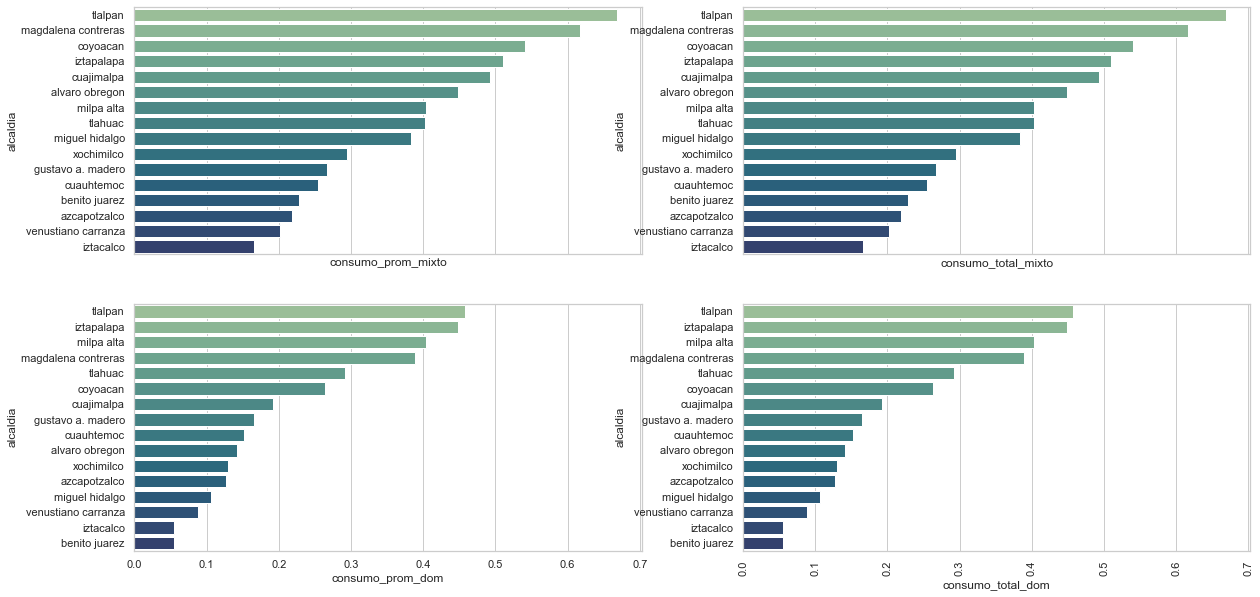

In [345]:
df_aux1 = df[ df.bimestre== 1 ].groupby(['alcaldia']).count()
df_aux1 = df_aux1 [['anio']] 
df_aux1.rename(columns={ 'anio': 'conteo'}, inplace=True)
df_per_miss_values = df_aux1.merge(df_missing_values[df_missing_values.bimestre == 1], on='alcaldia', how='left')

df_per_miss_values = df_aux1.merge(df_missing_values[df_missing_values.bimestre == 1], on='alcaldia', how='left')
df_per_miss_values['consumo_total_mixto'] = df_per_miss_values.consumo_total_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_total_dom'] = df_per_miss_values.consumo_total_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_total_no_dom'] = df_per_miss_values.consumo_total_no_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_mixto'] = df_per_miss_values.consumo_prom_mixto/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_dom'] = df_per_miss_values.consumo_prom_dom/df_per_miss_values.conteo
df_per_miss_values['consumo_prom_no_dom'] = df_per_miss_values.consumo_prom_no_dom/df_per_miss_values.conteo

def funcion_per_nulos(df_per_miss_values):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10))


    df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_mixto', ascending=False)
    sns.barplot(ax=axes[0,0], x=df_per_miss_values['consumo_prom_mixto'], y=df_per_miss_values['alcaldia'],
                     palette='crest', ci=0)
    df_per_miss_values = df_per_miss_values.sort_values('consumo_prom_dom', ascending=False)
    sns.barplot(ax=axes[1,0], x=df_per_miss_values['consumo_prom_dom'], y=df_per_miss_values['alcaldia'],
                     palette='crest', ci=0)

    df_per_miss_values = df_per_miss_values.sort_values('consumo_total_mixto', ascending=False)
    sns.barplot(ax=axes[0,1], x=df_per_miss_values['consumo_total_mixto'], y=df_per_miss_values['alcaldia'],
                     palette='crest', ci=0)
    df_per_miss_values = df_per_miss_values.sort_values('consumo_total_dom', ascending=False)
    sns.barplot(ax=axes[1,1], x=df_per_miss_values['consumo_total_dom'], y=df_per_miss_values['alcaldia'],
                     palette='crest', ci=0)

    plt.xticks(rotation= 90)
    plt.show()
    
funcion_per_nulos(df_per_miss_values)